### Imoprt Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from  sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectFromModel


### Read Data

In [2]:
tr_data = pd.read_csv('train - train.csv')
tr_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [3]:
ts_data = pd.read_csv('test - test.csv')
ts_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [4]:
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
tr_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Preparing the data 

In [6]:
tr_data['px_height'].head(10)

0      20.0
1     905.0
2    1263.0
3    1216.0
4    1208.0
5    1004.0
6     381.0
7     512.0
8     386.0
9    1137.0
Name: px_height, dtype: float64

In [7]:
tr_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
tr_data.duplicated().sum()

0

In [9]:
tr_data.dropna  (inplace=True)

In [10]:
tr_data.shape

(1991, 21)

In [11]:
# For data consistency as it represent categorical variables
tr_data['four_g'] =tr_data['four_g'].astype('int64') 

In [12]:
tr_data['four_g'].value_counts()

four_g
1    1037
0     954
Name: count, dtype: int64

In [13]:
tr_data['three_g'].value_counts()

three_g
1    1515
0     476
Name: count, dtype: int64

In [14]:
target_counts  = tr_data['price_range'].value_counts()
total_samples = len(tr_data)
cls_prcnt = (target_counts / total_samples) *100
cls_prcnt

price_range
2    25.062783
0    25.062783
3    24.962330
1    24.912104
Name: count, dtype: float64

<Axes: >

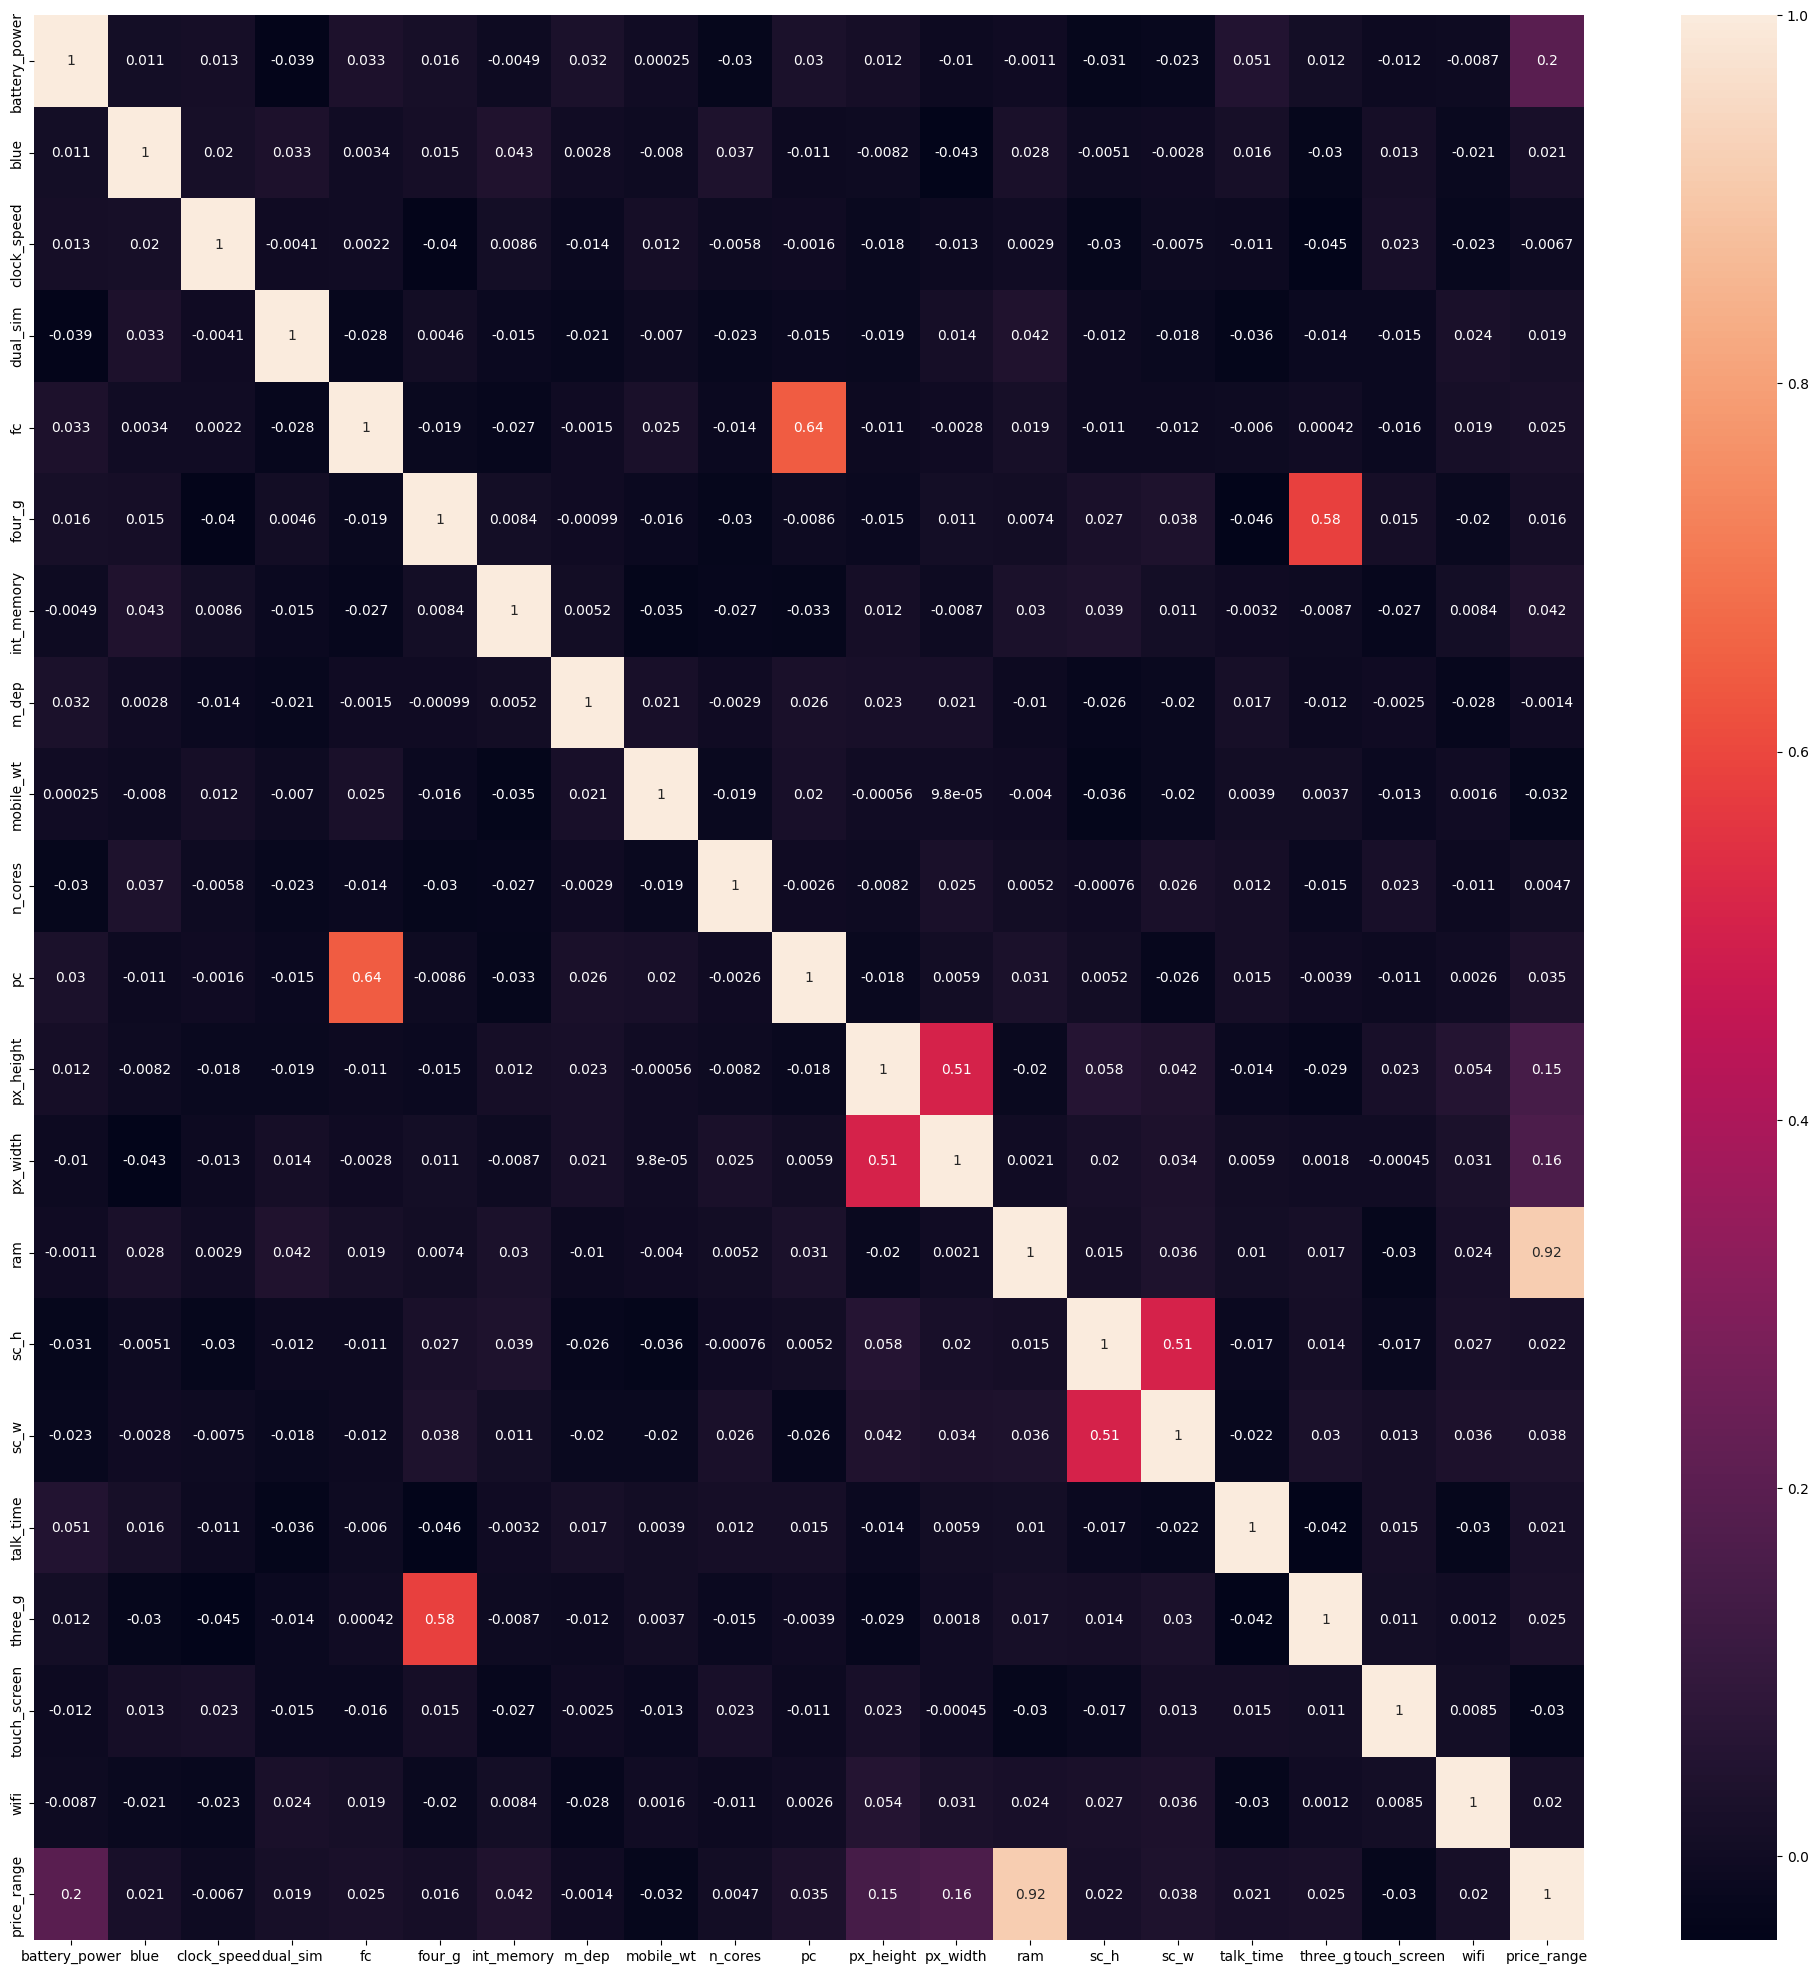

In [15]:
corrmat = tr_data.corr()
f, ax = plt.subplots(figsize=(25,25))
sns.heatmap(corrmat,annot=True)

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'fc'}>],
       [<Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >]], 

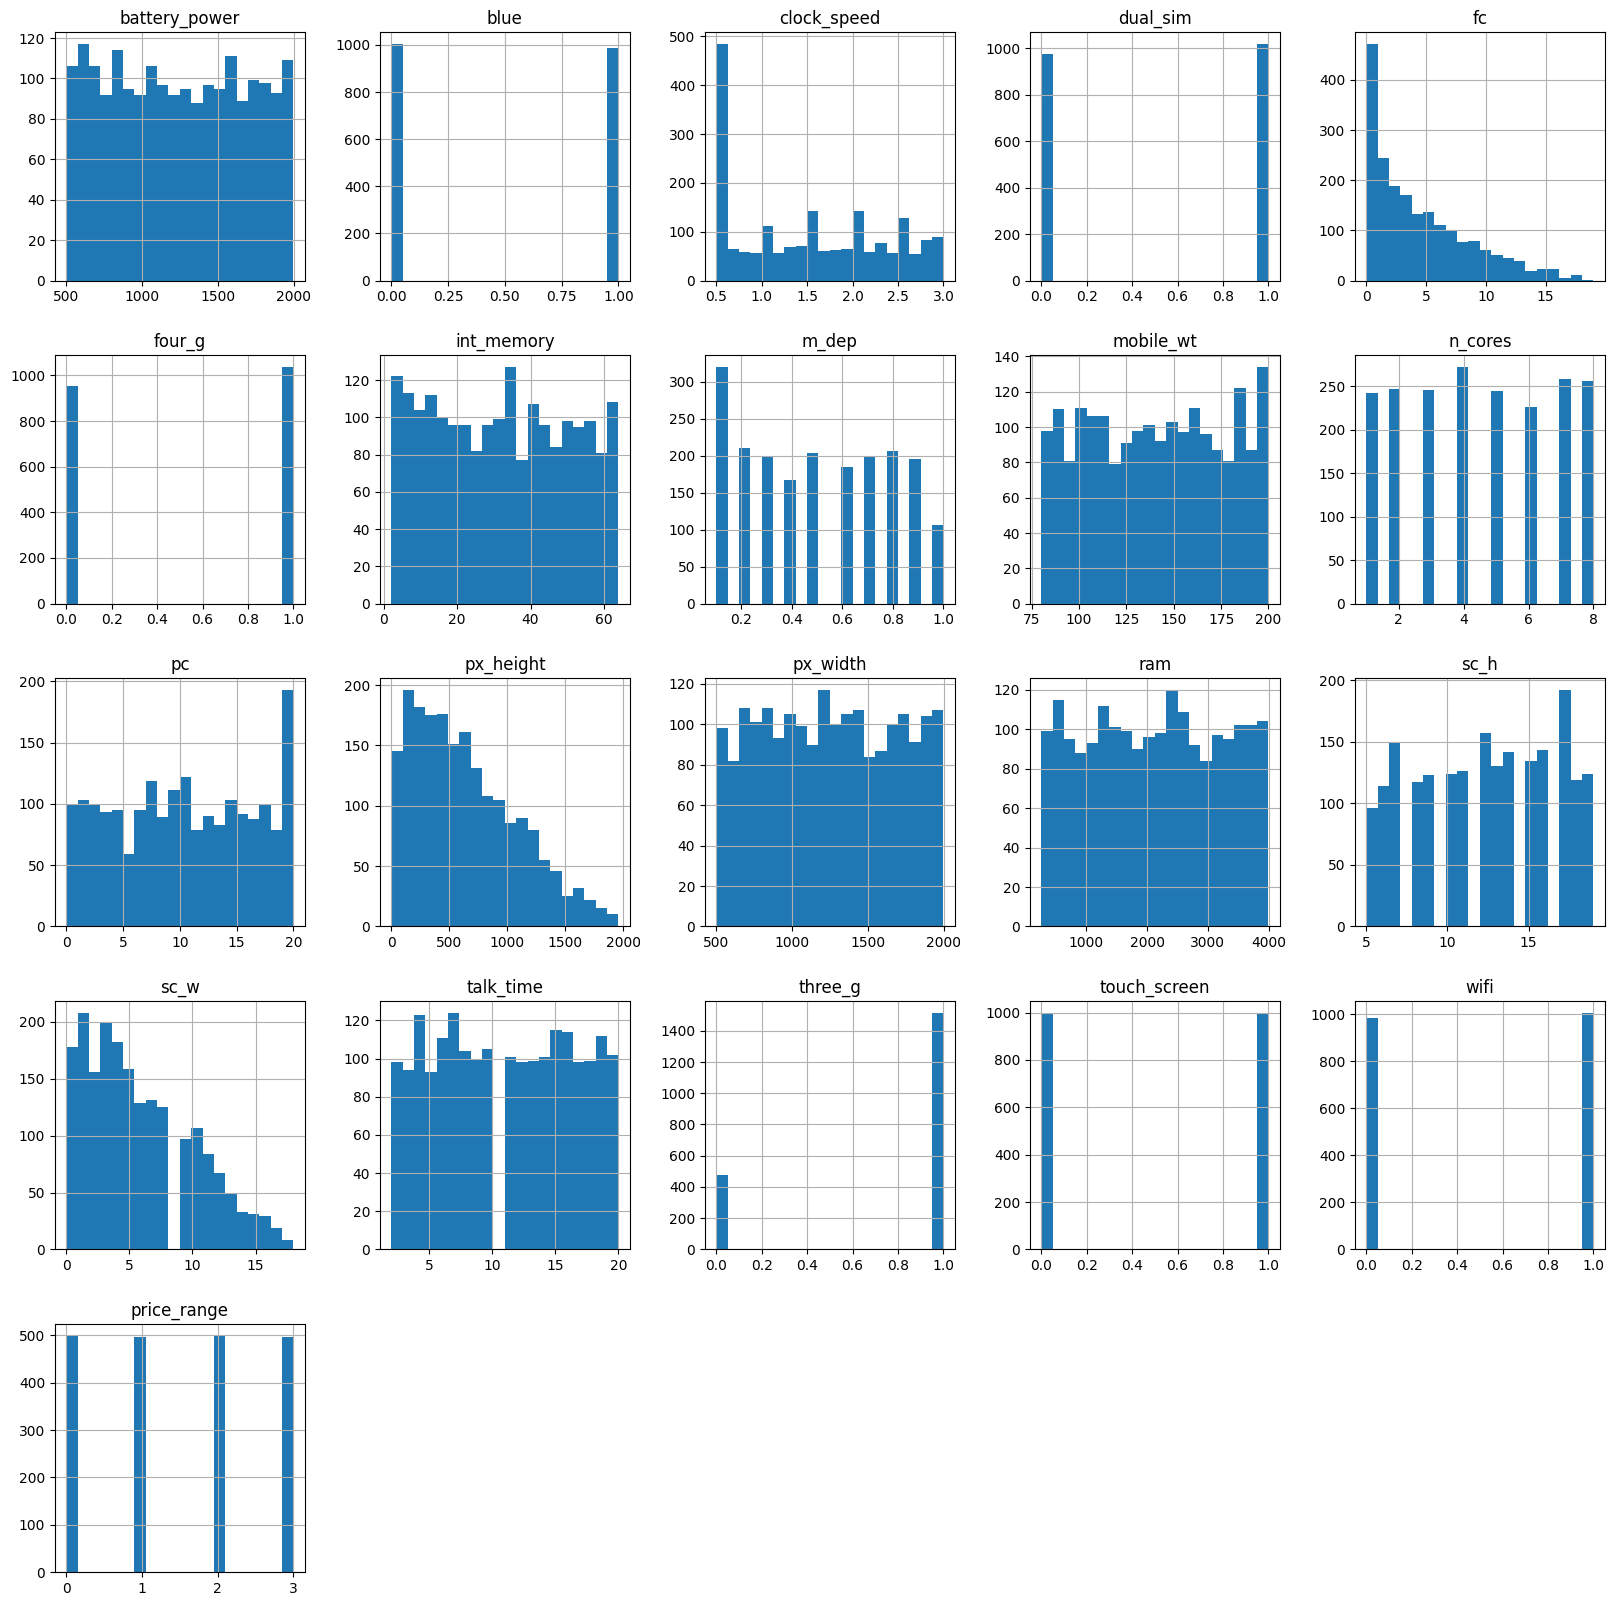

In [16]:
# Check the distribution for each feature  
tr_data.hist(figsize=(20,20),bins=20)

#### Observations

##### 1- There are 13 numerical features and 8 categorical feature

##### 2- As the two columns px_height (Pixel Resolution Height) and sc_w (Screen Width of mobile in cm) not making any sense to be zero or close to zero, so these instence shows as noise data or outliers 
##### ->Solution: implement classification models that are robust and less sensitive to such irregularities

In [17]:
tr_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [18]:
numerical = ['battery_power',  'clock_speed',  'fc', 
       'int_memory', 'm_dep', 'mobile_wt',  'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

In [19]:
shortb = tr_data[['clock_speed',  'fc', 
       'int_memory', 'm_dep', 'mobile_wt',  'pc', 'sc_h', 'sc_w', 'talk_time']]

In [20]:
longb = tr_data[['battery_power','px_height',
       'px_width','ram']]

<Axes: >

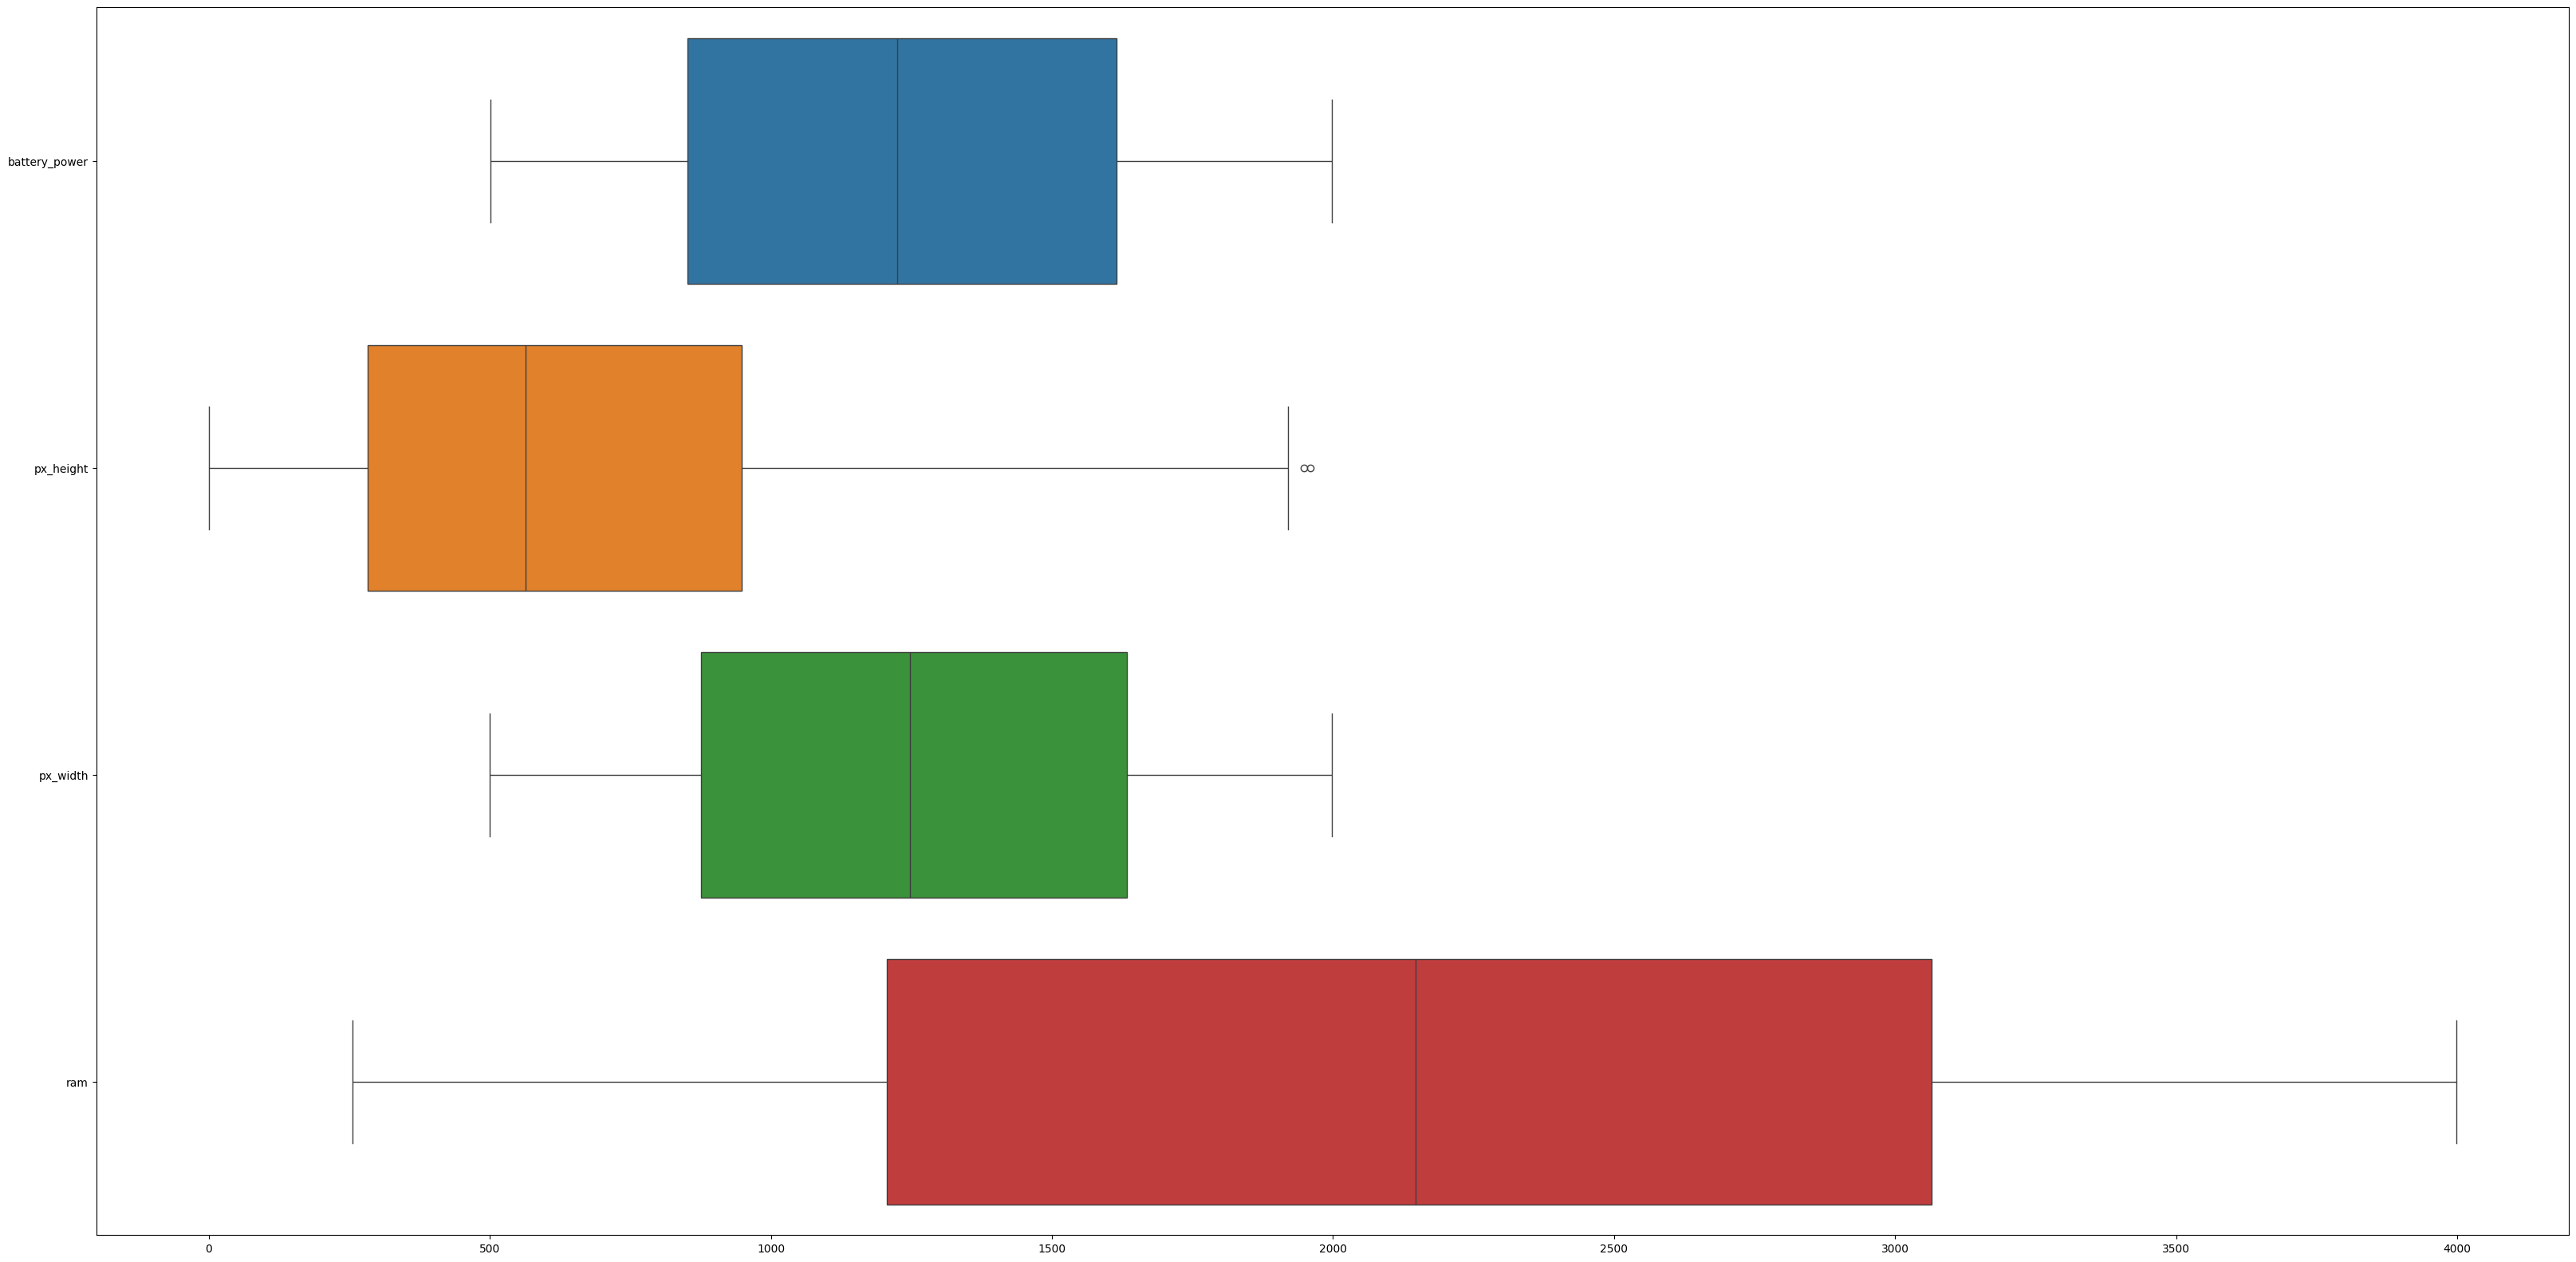

In [21]:
plt.figure(figsize=(40,20))
sns.boxplot(data=longb,orient='h')

<Axes: >

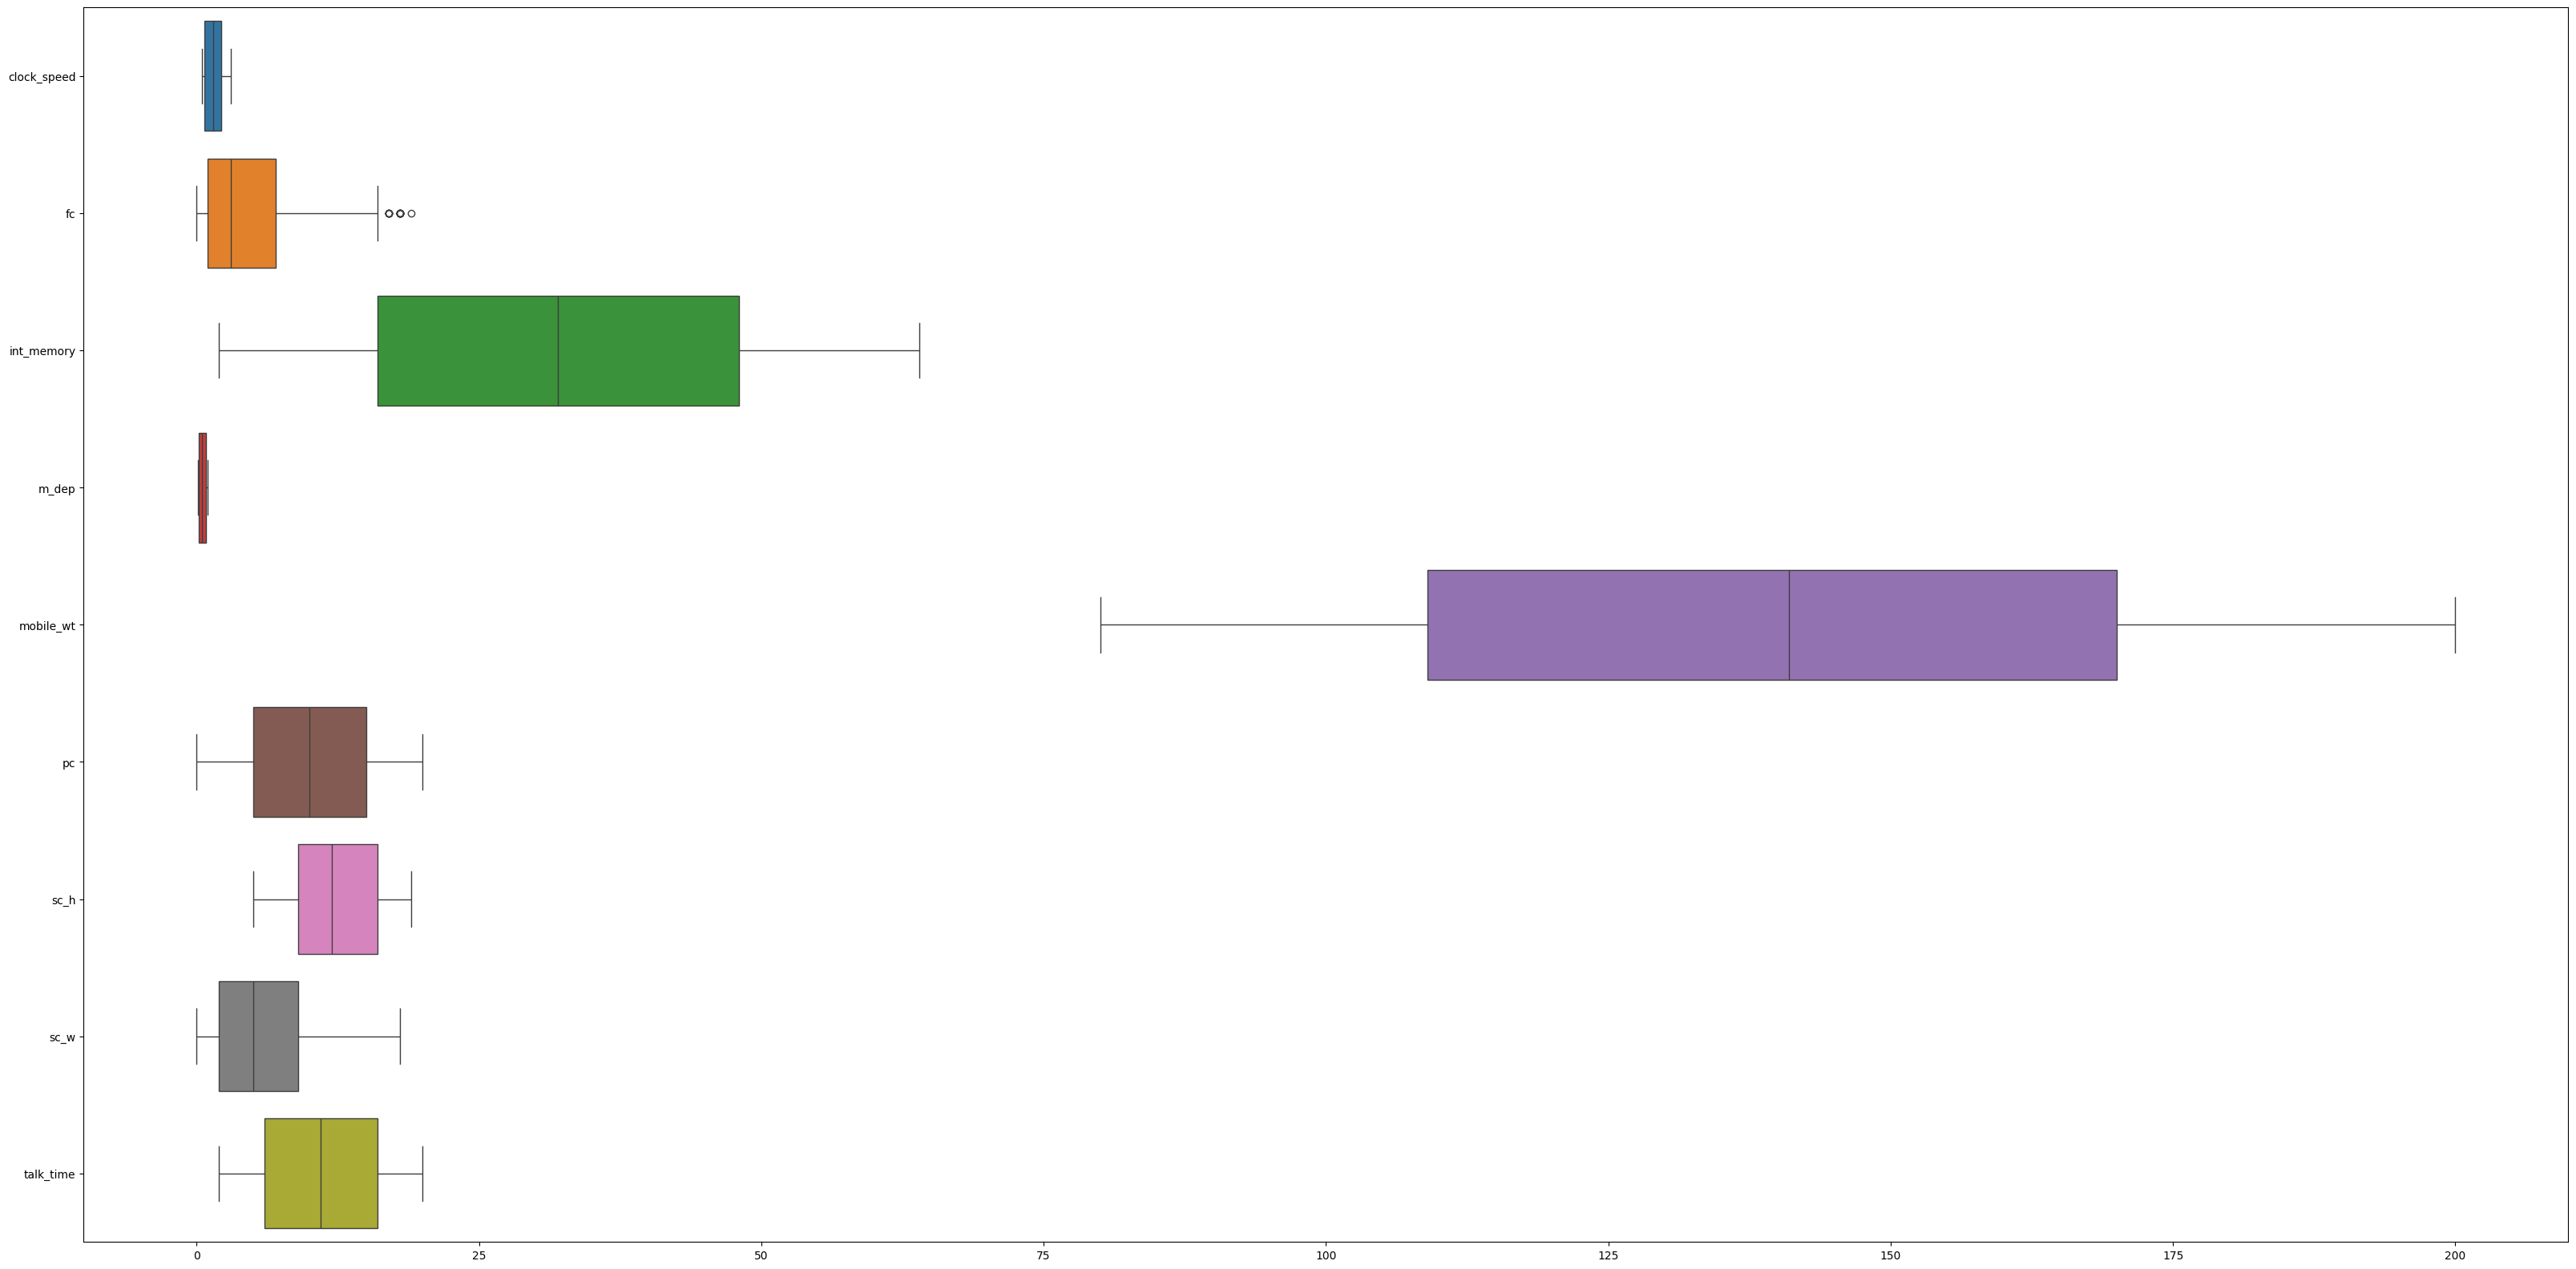

In [22]:
plt.figure(figsize=(40,20))
sns.boxplot(data=shortb,orient='h')

## Model Training

In [23]:
def plot_confusion_matrix(y_true, y_pred,title = 'Confusion Matrix', labels=None):

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    if labels:
        plt.xticks(ticks=range(len(labels)), labels=labels)
        plt.yticks(ticks=range(len(labels)), labels=labels)
    plt.show()

    report = classification_report(y_true, y_pred, target_names=labels)
    print("Classification Report:")
    print(report)

In [24]:
X = tr_data.drop('price_range',axis=1)
y = tr_data['price_range']

In [25]:
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.8,random_state=1,stratify=y) 

### Normalization

In [26]:
X_train_scale = X_train.copy()
X_val_scale = X_val.copy()

In [27]:
scaler = StandardScaler()
X_train_scale[numerical] = scaler.fit_transform(X_train_scale[numerical])
X_val_scale[numerical] = scaler.transform(X_val_scale[numerical])

### Random Forest

In [28]:
rf_model = RandomForestClassifier(min_samples_leaf= 37
                              ,max_depth=4, n_estimators=100, random_state=42)
# rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scale, y_train)
y_pred_rf_scale = rf_model.predict(X_val_scale)

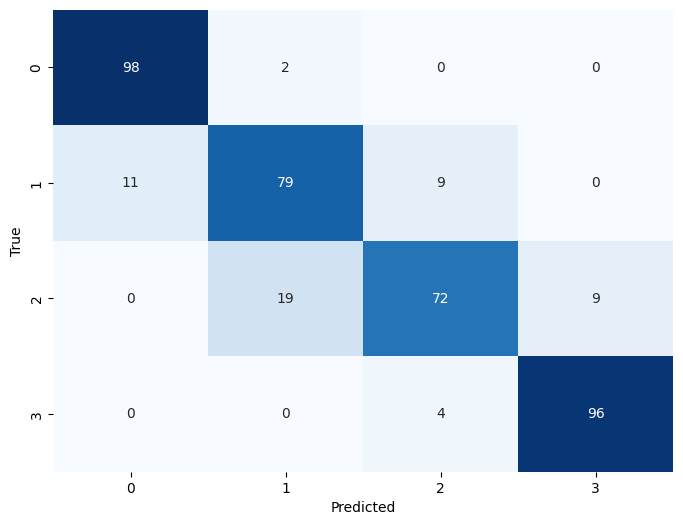

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       100
           1       0.79      0.80      0.79        99
           2       0.85      0.72      0.78       100
           3       0.91      0.96      0.94       100

    accuracy                           0.86       399
   macro avg       0.86      0.86      0.86       399
weighted avg       0.86      0.86      0.86       399



In [29]:
plot_confusion_matrix(y_val,y_pred_rf_scale)

In [30]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 5, 7],
    'min_samples_leaf': [30,35,40]
}

In [31]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [32]:
grid_search.fit(X_train_scale, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 7],
                         'min_samples_leaf': [30, 35, 40],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [33]:
# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions on the test set
y_pred = best_estimator.predict(X_val_scale)

# Print the classification report
print(classification_report(y_val, y_pred))


Best Parameters: {'max_depth': 7, 'min_samples_leaf': 30, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       100
           1       0.83      0.79      0.81        99
           2       0.85      0.82      0.84       100
           3       0.96      0.96      0.96       100

    accuracy                           0.89       399
   macro avg       0.89      0.89      0.89       399
weighted avg       0.89      0.89      0.89       399



### SVM

In [34]:
svm = SVC(kernel='rbf',random_state=42)
svm.fit(X_train, y_train)

y_pred_svm_scale = svm.predict(X_val)

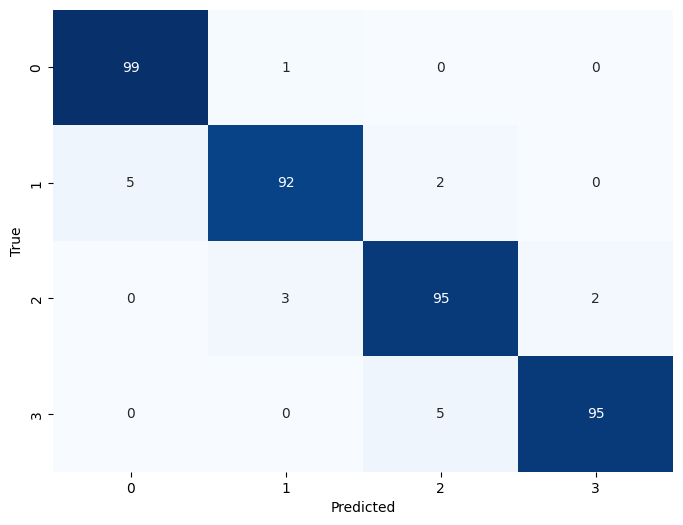

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       100
           1       0.96      0.93      0.94        99
           2       0.93      0.95      0.94       100
           3       0.98      0.95      0.96       100

    accuracy                           0.95       399
   macro avg       0.96      0.95      0.95       399
weighted avg       0.96      0.95      0.95       399



In [35]:
plot_confusion_matrix(y_val,y_pred_svm_scale)

##### The model shows balanced performance across all classes with precision, recall, and F1-scores consistently high, indicating that the model is not biased towards any particular class.

### Gaussian Naive Bayes

In [36]:
nb_model=GaussianNB()
nb_model.fit(X_train_scale, y_train)
y_pred_nb_scale = nb_model.predict(X_val_scale)

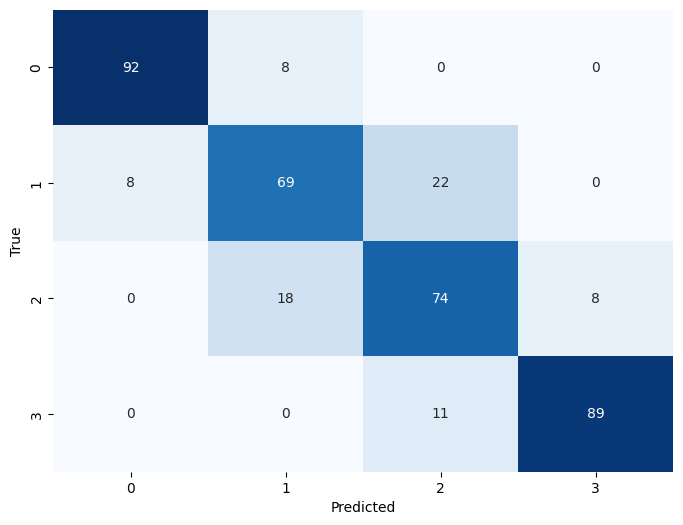

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       100
           1       0.73      0.70      0.71        99
           2       0.69      0.74      0.71       100
           3       0.92      0.89      0.90       100

    accuracy                           0.81       399
   macro avg       0.81      0.81      0.81       399
weighted avg       0.81      0.81      0.81       399



In [37]:
plot_confusion_matrix(y_val,y_pred_nb_scale)

In [38]:
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}

In [39]:
gnb = GaussianNB()

In [40]:
grid_search_nb = GridSearchCV(estimator=gnb, param_grid=param_grid_nb, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [41]:
grid_search_nb.fit(X_train_scale, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='accuracy', verbose=2)

In [42]:
# Get the best parameters and estimator
best_params = grid_search_nb.best_params_
best_estimator = grid_search_nb.best_estimator_

print("Best Parameters:", best_params)

# Make predictions on the test set
y_pred = best_estimator.predict(X_val_scale)

# Print the classification report
print(classification_report(y_val, y_pred))


Best Parameters: {'var_smoothing': 0.01}
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       100
           1       0.75      0.70      0.72        99
           2       0.69      0.76      0.72       100
           3       0.94      0.90      0.92       100

    accuracy                           0.83       399
   macro avg       0.83      0.83      0.83       399
weighted avg       0.83      0.83      0.83       399



In [43]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [44]:
ts_data = ts_data.drop('id',axis=1)

In [45]:
X_test= ts_data.copy()

### Choosed the SVM for it's high performance to predict the price range for the test data set 

In [52]:
# Test the trained model on the test set
y_pred_test = svm.predict(X_test[:20])

In [53]:
# Print the predicted labels
print("Predicted labels:", y_pred_test)

Predicted labels: [3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2]


In [58]:
y_pred_test_rf = grid_search.predict(X_test)
# Print the predicted labels
print("Predicted labels:", y_pred_test_rf)

Predicted labels: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 

In [60]:
import pickle

In [61]:
# Assuming your trained model is stored in a variable named 'model'
with open('SVM_model.pkl', 'wb') as file:
    pickle.dump(svm, file)

In [66]:
import joblib

In [67]:
joblib.dump(svm, 'svm_model.joblib')

['svm_model.joblib']

In [68]:
model = joblib.load('svm_model.joblib')

In [76]:
X_test[2:3]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
